# DATA ANALYSIS: COMCAST TELECOM CONSUMER COMPLAINTS

## Data Dictionary:
    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone

## Analysis Task:
    - Import data into Python environment.
    - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
    - Provide a table with the frequency of complaint types.

    Q Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
    - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
    - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from above question. Provide insights on:

    Q Which state has the maximum complaints?
    Q Which state has the highest percentage of unresolved complaints?
    - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
    

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data into Python environment.

In [10]:
df=pd.read_csv("/Users/muskansharma/Downloads/data science with python simplilearn/Comcast_telecom_complaints_data.csv")

In [11]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [12]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [5]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

## Providing the trend chart for the number of complaints at monthly and daily granularity levels:

In [ ]:
# As seen in the data there is no column for Month, in order to extract the month from the Date column we should 
#-firstly check the data type of Date column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [ ]:
# Since the datatype is object.We need to convert it to datetime datatype in order to extract month.

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [9]:
df['Month']=df['Date'].dt.month_name()

In [10]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [11]:
df.groupby(['Date']).size()

Date
2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
              ..
2015-06-26    55
2015-06-27    39
2015-06-28    27
2015-06-29    51
2015-06-30    53
Length: 91, dtype: int64

In [13]:
#to convert into dataframe
daily=df.groupby(['Date']).size().reset_index()

In [15]:
#to rename 0 with counts
daily=daily.rename(columns={0:'counts'})

In [16]:
daily

,Date,counts
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


## Trend chart for the number of complaints at daily granularity levels.

<AxesSubplot:xlabel='Date'>

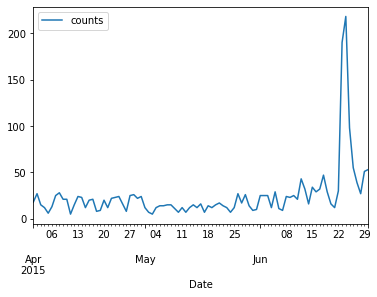

In [17]:
#Line plot
daily.plot(x='Date',y='counts', kind='line')

In [18]:
#sorted data in descending order
daily.sort_values('counts',ascending=False)

,Date,counts
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


## INFERENCE: 

### -Maximum number of complaints are witnessed between 23rd-26th June.

## Trend chart for the number of complaints at monthly granularity levels.

In [21]:
month=df.groupby('Month').size().reset_index()

In [24]:
month=month.rename(columns={0:'Count'})

In [25]:
month

,Month,Count
0,April,545
1,June,1280
2,May,399


<AxesSubplot:xlabel='Month'>

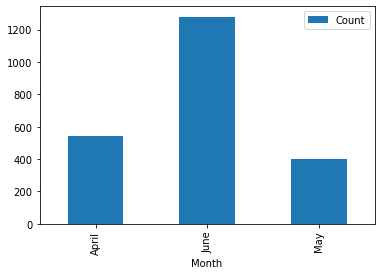

In [27]:
month.plot(x='Month',y='Count',kind='bar')

## INFERENCE:

### -Maximum complaints are witnessed in the month of June.

## Providing table of frequency of complaint types:

In [42]:
df['Customer Complaint']=df['Customer Complaint'].apply(lambda x: x.lower().replace('caps','cap'))

In [43]:
#frequency of complaint type
data=df['Customer Complaint'].value_counts()[:10].reset_index()

In [44]:
data

,index,Customer Complaint
0,comcast,102
1,comcast data cap,51
2,comcast internet,29
3,data cap,25
4,comcast billing,18
5,internet speed,15
6,comcast service,15
7,unfair billing practices,13
8,comcast complaint,11
9,comcast/xfinity,11


<AxesSubplot:xlabel='index'>

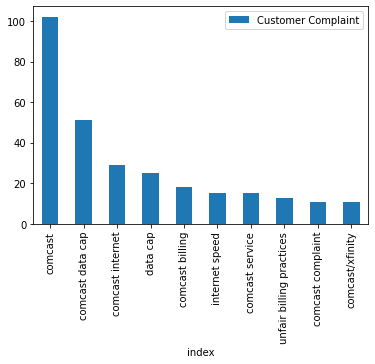

In [45]:
data.plot(x='index',y='Customer Complaint', kind='bar')

## Finding which complaint types are maximum i.e., around internet, network issues, or across any other domains.

##### Internet Issues:

In [49]:
internet1=df[df['Customer Complaint'].str.contains('internet')].count()

In [51]:
internet2=df[df['Customer Complaint'].str.contains('speed')].count()

In [52]:
internet3=df[df['Customer Complaint'].str.contains('data')].count()

In [53]:
internet4=df[df['Customer Complaint'].str.contains('network')].count()

In [54]:
total_internet_issue=internet1+internet2+internet3+internet4

In [56]:
total_internet_issue['Ticket #']

945

##### Billing Issues:

In [13]:
billing1=df[df['Customer Complaint'].str.contains('billing')].count()

In [15]:
billing2=df[df['Customer Complaint'].str.contains('charge')].count()

In [61]:
total_bill=billing1+billing2

In [67]:
total_bill['Ticket #']

437

##### Service Issues:

In [59]:
Service1=df[df['Customer Complaint'].str.contains('service')].count()

In [60]:
Service2=df[df['Customer Complaint'].str.contains('customer')].count()

In [62]:
total_service=Service1+Service2

In [68]:
total_service['Ticket #']

584

##### Other Issues:

In [65]:
df.shape

(2224, 12)

In [64]:
other_issue=2224-(total_internet_issue+total_bill+total_service)

In [69]:
other_issue['Ticket #']

258

## INFERENCE:

### -Internet complaints are maximum followed by Service Issues.



## Creating a new categorical variable with value as Open and Closed.Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [71]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [72]:
df['new_status']=['Open'  if x=='Open' or x=='Pending' else 'Closed'  for x in df['Status']]

In [73]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,new_status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,service availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April,Closed
2220,318775,comcast monthly billing for returned modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2222,360489,extremely unsatisfied comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed


## Providing state wise status of complaints in a stacked bar chart. Using the categorized variable new_status.

## To provide insights on:

## 1.Which state has the maximum complaints?

## 2.Which state has the highest percentage of unresolved complaints?

In [75]:
df.groupby(['State', 'new_status']).size()

State          new_status
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Length: 77, dtype: int64

In [76]:
df.groupby(['State', 'new_status']).size().unstack()

new_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [77]:
state_complain=df.groupby(['State', 'new_status']).size().unstack()

<AxesSubplot:xlabel='State'>

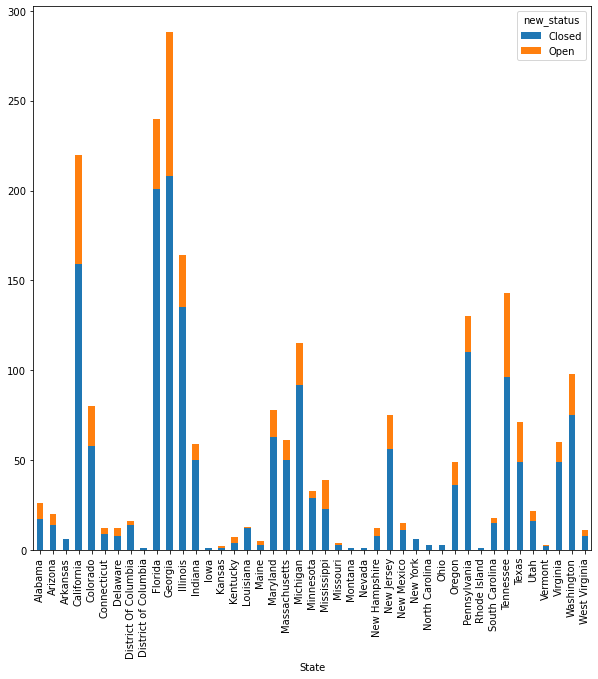

In [79]:
state_complain.plot.bar(stacked=True, figsize=(10,10))

In [83]:
#df['State'].value_counts()
df.groupby('State').size().sort_values(ascending=False)[0:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

## INFERENCE 1:

### State with the maximum number of complaints is Georgia followed by Florida , California , Illinois and Tennessee.

In [ ]:
#unresolved complaints:

In [92]:
unresolved_data=df.groupby(['State','new_status']).size().unstack().fillna(0).sort_values(by="Open",ascending=False)

In [94]:
unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [95]:
unresolved_data

new_status,Closed,Open,unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


<AxesSubplot:xlabel='State'>

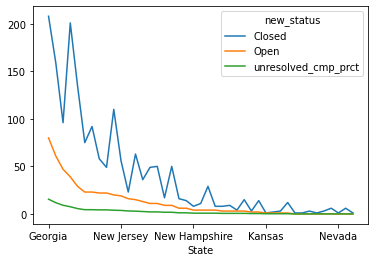

In [96]:
unresolved_data.plot()

## INFERENCE:

### -Georgia has the highest percentage of unresolved complaints.




## Providing the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [97]:
resolved_data=df.groupby(['Received Via', 'new_status']).size().unstack().fillna(0)

In [98]:
resolved_data

new_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [99]:
resolved_data['resolve']=resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [100]:
resolved_data['resolve']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolve, dtype: float64

## INFERENCE:

### -Around 51% and 50% of complaints were resolved by Customer care calls and Internet calls respectively. 

<AxesSubplot:xlabel='Received Via'>

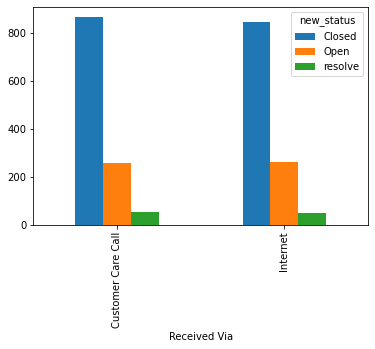

In [103]:
resolved_data.plot(kind='bar')